___
# MINIPROJETO 1

## <font color='red'>Victor Hugo Leal Vieira da Silva</font>
___

## <font color='blue'>Projeção populacional para aposentados</font>

### O miniprojeto abordará 'Pressão Cardíaca em mmHg em 200 paises'. Como variável foi escolhida essas pressões cardíacas para o ano de 2008.

___
### Itens 1 a 3 - Resolução:

In [130]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import matplotlib.patches as mpatches

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\VictorHugo\Documents\GitHub\CD\Miniprojeto


In [236]:
ex = pd.read_excel('Indicator_SBP male ASM.xlsx', sep=' ')
oi = ex[2008]
oi.describe()
dados = pd.Series(data=sorted(oi))

### 3)

#### Inspeção visual utilizando um histograma

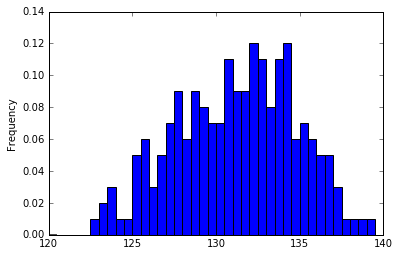

In [237]:
faixa = np.arange(120,140,0.5)
x = pd.cut(dados,faixa)

plot = dados.plot.hist(bins=faixa, normed=1)

___
### Itens 4 a 6 - Resolução:

### 4)


#### Observando a distribuição das gráficos, podemos observar que segue dois modelos teóricos. Os modelos teóricos escolhidos foram: Loggamma e Normal. Seguem abaixo imagens de modelo loggamma e normal que poderiam se assimilar à dispersão da variável escolhida. Entretanto os valores dos eixos são meramentes ilustrativos, não correspondendo ao modelo escolhido.


<img src="Linear_exemplo3.png" width="400">
<img src="Exp_exemplo2.png" width="400">

#### Observado as curvas populacionais escolhidas acima, foi escolhida, entre as 4 curvas,  a que tende a cresce mais: a curva de 75 anos ou mais. Irei iliminar as projeções populacionais acima de 2020 já abordadas pelo próprio gráfico para , através de modelos teóricos, elaborar uma projeção prória. Assim, temos o gráfico:

### 5)



#### Os valores estimados para o modelo 'loggamma' foram: 12; 102 e 12. Para o modelo 'norm' foram: 131.5 e 3.5

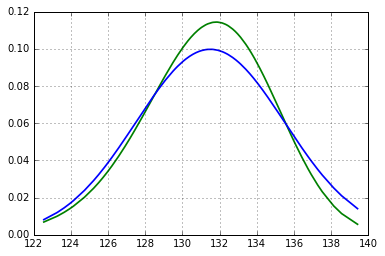

In [401]:
log = stats.loggamma.pdf(dados, 12,loc=102,scale=12)

plot = plt.plot(dados,log, '-', color= 'green', lw=1.7)
plot = plt.plot(dados, stats.norm.pdf(dados, loc=131.5 , scale=4), lw=1.7)
plt.grid()
plt.show()

### 6)


#### Estimativas utilizando a função fit():

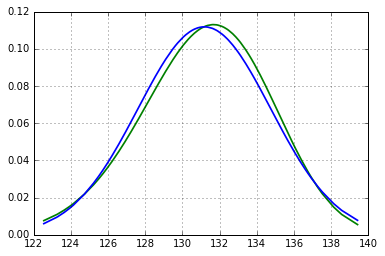

In [402]:
fita = stats.loggamma.fit(dados)
maoi = stats.loggamma.pdf(dados, fita[0],loc=fita[1],scale=fita[2])

plot = plt.plot(dados,maoi, '-', color= 'green', lw=1.7)
plot = plt.plot(dados, stats.norm.pdf(dados, *stats.norm.fit(dados, loc=dados.mean(), scale=dados.std())), lw=1.7)
plt.grid()
plt.show()

#### Os resultados para o modelo 'loggamma' foram de :13.01 ;99.1 e 12.6. Os estimados para o modelo 'loggamma' foram de : 12 ;102 e 12
#### Os resultados para o modelo 'loggamma' foram de :131.1 e 3.5. Os estimados para o modelo 'loggamma' foram de : 131.5, 4

#### Para os dois modelos, foi escolhido os parâmetros obtidos a partir da função fit()

___
### Itens 7 a 9 - Resolução:

### 7)

#### Gráfico histograma + fdp :

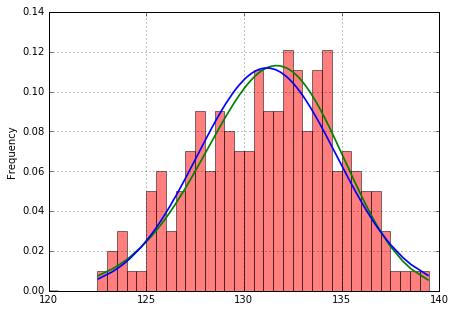

In [430]:
plot = plt.plot(dados,maoi, '-', color= 'green', lw=1.7)
plot = plt.plot(dados, stats.norm.pdf(dados, *stats.norm.fit(dados, loc=dados.mean(), scale=dados.std())), lw=1.7)
plot = dados.plot.hist(bins = faixa, normed = True, alpha = 0.5, color = "r", figsize = (7,5))
plot.grid()
plt.show()

### 8)

#### Gráfico  QQ-Plot (quantil amostral vs quantil teórico):

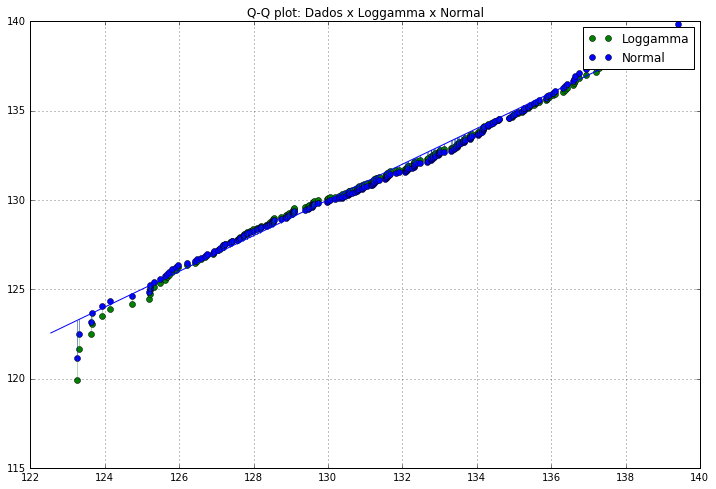

In [434]:
fq = [] # frequencia relativa acumulada
for i in range(len(dados)):
    acumulada = (i - 0.5) / len(dados)
    if acumulada < 0:
        acumulada = 0
    fq.append(acumulada)

# Convertemos fra em uma Series do Pandas
fq = pd.Series(data=fq)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_loggamma = stats.loggamma.ppf(fq, fita[0],loc=fita[1],scale=fita[2])
q_norm = stats.norm.ppf(fq, *stats.norm.fit(dados, loc=dados.mean(), scale=dados.std()))

fig = plt.figure(figsize=(12,8))
plt.title("Q-Q plot: Dados x Loggamma x Normal")

loggamma_plot, = plt.plot(dados, q_loggamma, 'o', color="green", label="Loggamma")
norm_plot, = plt.plot(dados, q_norm, 'o', color="blue", label = "Normal")

for i in range(len(dados)):
    plt.plot((dados[i], dados[i]), (q_loggamma[i], dados[i]), '-', color='green', alpha=0.3  )
    plt.plot((dados[i], dados[i]), (q_norm[i], dados[i]), '-', color='blue', alpha=0.3  )
    
plt.legend(handles=[loggamma_plot, norm_plot])
plt.plot((min(dados), max(dados)), (min(dados), max(dados)), '-')
plt.grid()
plt.show()

#### Pela análise do gráfico, nota-se que ambos os modelos teóricos estão próximos da base de dados em análise. Analisando a olho nú, penso que o modelo Normal é mais parecido com nossa base de dados.

### 9)


#### Frequência relativa acumulada a partir dos meus dados vs a função de distribuição acumulada:

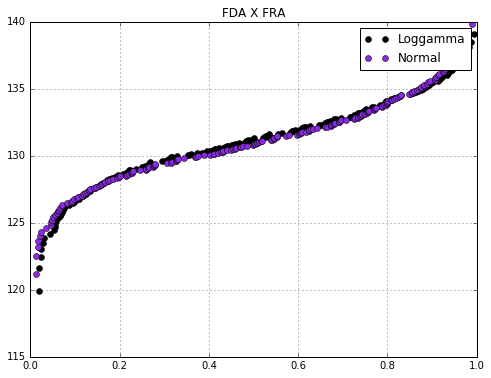

In [463]:
# Gera os valores dos quantis teóricos para as distribuições analisadas
cdf_loggamma = stats.loggamma.cdf(dados, fita[0], fita[1], fita[2]) # quantis teóricos da exponencial
cdf_norm = stats.norm.cdf(dados, *stats.norm.fit(dados, loc=dados.mean(), scale=dados.std()))

fig = plt.figure(figsize=(8,6))

plt.title("FDA X FRA")

loggamma_plot, = plt.plot(cdf_loggamma, q_loggamma, 'o', color="black", label="Loggamma")
norm_plot, = plt.plot(cdf_norm, q_norm, 'o', color="blueviolet", label = "Normal")

plt.legend(handles=[loggamma_plot, norm_plot])
plt.plot()
plt.grid()
plt.show()

#### A partir desse gráfico é notável que os dois modelos estão bem próximos um do outro, ou seja, ainda é não é possível esclarecer qual deles, Logamma ou Normal, é mais adequado à nossa modelo.

___
### Itens 10 e 11 - Resolução:

### 10)

#### Teste de aderência para a distribuição:

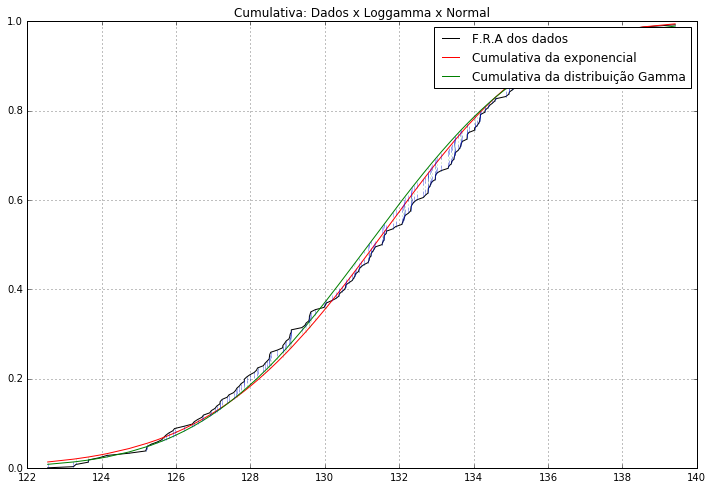

In [452]:
# fq e FDA
cdf_loggamma = stats.loggamma.cdf(dados, fita[0], fita[1], fita[2]) #Fq
cdf_norm = stats.norm.cdf(dados, *stats.norm.fit(dados, loc=dados.mean(), scale=dados.std()))


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Loggamma x Normal")

dados_fq_plot, = plt.plot(dados, fq, '-', color='black', label="F.R.A dos dados")
cdf_loggamma_plot,   = plt.plot(dados, cdf_loggamma, '-', color='red', label = "Cumulativa da exponencial")
cdf_norm_plot, = plt.plot(dados, cdf_norm, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fq_plot, cdf_loggamma_plot, cdf_norm_plot])
plt.grid()

for i in range(len(dados)):
    plt.plot((dados[i], dados[i]), (fq[i], cdf_loggamma[i]), ':', color="green", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((dados[i], dados[i]), (fq[i], cdf_norm[i]), '--', color="blue", alpha=0.3)
plt.show()

### 11)

#### 1.1 Erro quadrático nas CDF's

In [457]:
erro_quadratico_loggamma = sum((fq - cdf_loggamma)**2)
erro_quadratico_norm = sum((fq - cdf_norm)**2)

print("Erro quadrático da Loggamma :{:4.3f}\n".format(erro_quadratico_loggamma))
print("Erro quadrático da Normal :{:4.3f}\n".format(erro_quadratico_norm))


Erro quadrático da Loggamma :0.083

Erro quadrático da Normal :0.133



#### 1.2 Diferença absoluto


In [459]:
# Diferenças absolutas
soma_difs_cdf_loggamma = sum( abs(fq - cdf_loggamma))
soma_difs_cdf_norm = sum( abs(fq - cdf_norm))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_loggamma, soma_difs_cdf_norm))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 3.438519478682075 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 4.237214936823047


#### 1.3 Teste de aderência de Kolmogorov-Smirnov

In [462]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_loggamma = max(abs(fq-cdf_loggamma))
ks_aderencia_norm = max(abs(fq-cdf_norm))


print("Teste K-S para a exponencial com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}: {:4.3f}".format(dados.mean(), ks_aderencia_loggamma, fita[0],fita[2], ks_aderencia_norm))

Teste K-S para a exponencial com μ= 131.18: 0.045
Teste K-S para a gamma com scale=13.019, loc=0 e a=12.657: 0.057


#### Tabela de erros:

|        Erro        |    Loggamma   |   Normal    |
|--------------------|------------|------------|
|     Quadrático     |    0.083   |    0.133   |
|Diferenças Absolutas|   3.4385   |   4.2372   |
| Kolmogorov-Smirnov |    0.045   |    0.057   |

### De acordo com a tabela de erros, concluimos que o melhor modelo teórico para a minha base de dados é o modelo 'Loggamma' (diferentemente do meu pensamento), pois possui um menor erro em comparação ao modelo 'Normal'.